<a href="https://colab.research.google.com/github/gyeongdong13/Competition/blob/main/%EC%9C%A0%ED%86%B5%EC%82%AC_%EC%99%B8_%EC%A0%9C%ED%9C%B4%EC%82%AC_%EC%98%88%EC%B8%A1%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import ReduceLROnPlateau
import math
import matplotlib.pyplot as plt

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/LPOINT 3번 data.csv')
df3

col_name = ['고객번호', '영수증 번호', '제휴사', '점포코드', '채널 구분', '이용일자', '방문일자', '이용시간', '이용금액']
df3.columns = col_name
df3

,고객번호,영수증 번호,제휴사,점포코드,채널 구분,이용일자,방문일자,이용시간,이용금액
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500
...,...,...,...,...,...,...,...,...,...
248299,M058650684,21111614C021426818,C02,C020002,1,20211116,20211116,14,2000
248300,M058650684,21111619C023223432,C02,C020002,1,20211116,20211116,19,26900
248301,M014154595,21121209C015324520,C01,C010087,2,20211212,20211212,9,2000
248302,M510878172,21112719C013369102,C01,C010007,2,20211127,20211127,19,6000


In [ ]:
df3["이용일자"] = df3["이용일자"].astype(str)
df3

,고객번호,영수증 번호,제휴사,점포코드,채널 구분,이용일자,방문일자,이용시간,이용금액
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500
...,...,...,...,...,...,...,...,...,...
248299,M058650684,21111614C021426818,C02,C020002,1,20211116,20211116,14,2000
248300,M058650684,21111619C023223432,C02,C020002,1,20211116,20211116,19,26900
248301,M014154595,21121209C015324520,C01,C010087,2,20211212,20211212,9,2000
248302,M510878172,21112719C013369102,C01,C010007,2,20211127,20211127,19,6000


In [ ]:
# 구매일자를 날짜형 데이터로 변환
from datetime import datetime
df3["이용일자"] = pd.to_datetime(df3["이용일자"])

# 연월로 변경
df3["연월"] = df3["이용일자"].dt.strftime("%Y%m")
df3

,고객번호,영수증 번호,제휴사,점포코드,채널 구분,이용일자,방문일자,이용시간,이용금액,연월
0,M839993508,21102612B015763935,B01,B010012,1,2021-10-26,20211026,12,60000,202110
1,M839993508,21110610B014219744,B01,B010012,1,2021-11-06,20211106,10,17100,202111
2,M839993508,21021112B013419710,B01,B010012,1,2021-02-11,20210211,12,136500,202102
3,M839993508,21092010B012637545,B01,B010012,1,2021-09-20,20210920,10,34200,202109
4,M839993508,21101009D015920171,D01,D010614,1,2021-10-10,20211010,9,2500,202110
...,...,...,...,...,...,...,...,...,...,...
248299,M058650684,21111614C021426818,C02,C020002,1,2021-11-16,20211116,14,2000,202111
248300,M058650684,21111619C023223432,C02,C020002,1,2021-11-16,20211116,19,26900,202111
248301,M014154595,21121209C015324520,C01,C010087,2,2021-12-12,20211212,9,2000,202112
248302,M510878172,21112719C013369102,C01,C010007,2,2021-11-27,20211127,19,6000,202111


In [ ]:
# 20년 12월 데이터는 약 50명에 불과하므로 제거
from datetime import datetime
df3["이용일자"] = pd.to_datetime(df3["이용일자"])
df3 = df3[(df3["이용일자"] >= pd.to_datetime("20210101"))]
df3

,고객번호,영수증 번호,제휴사,점포코드,채널 구분,이용일자,방문일자,이용시간,이용금액,연월
0,M839993508,21102612B015763935,B01,B010012,1,2021-10-26,20211026,12,60000,202110
1,M839993508,21110610B014219744,B01,B010012,1,2021-11-06,20211106,10,17100,202111
2,M839993508,21021112B013419710,B01,B010012,1,2021-02-11,20210211,12,136500,202102
3,M839993508,21092010B012637545,B01,B010012,1,2021-09-20,20210920,10,34200,202109
4,M839993508,21101009D015920171,D01,D010614,1,2021-10-10,20211010,9,2500,202110
...,...,...,...,...,...,...,...,...,...,...
248299,M058650684,21111614C021426818,C02,C020002,1,2021-11-16,20211116,14,2000,202111
248300,M058650684,21111619C023223432,C02,C020002,1,2021-11-16,20211116,19,26900,202111
248301,M014154595,21121209C015324520,C01,C010087,2,2021-12-12,20211212,9,2000,202112
248302,M510878172,21112719C013369102,C01,C010007,2,2021-11-27,20211127,19,6000,202111


In [ ]:
year_month = list(df3["연월"].unique())
pred_data = pd.DataFrame()

year_month

['202110',
 '202111',
 '202102',
 '202109',
 '202105',
 '202106',
 '202107',
 '202108',
 '202112',
 '202103',
 '202104',
 '202101']

#방문횟수 예측

In [ ]:
grouped = df3.groupby(['고객번호','연월'], as_index = False)["이용일자"].count()
grouped

,고객번호,연월,이용일자
0,M000034966,202110,1
1,M000059535,202103,1
2,M000136117,202102,1
3,M000136117,202103,2
4,M000136117,202104,1
...,...,...,...
112325,M999962961,202107,1
112326,M999962961,202108,3
112327,M999962961,202109,5
112328,M999962961,202110,2


In [ ]:
grouped.rename(columns = {"이용일자" : "방문 횟수"}, inplace = True)

grouped

,고객번호,연월,방문 횟수
0,M000034966,202110,1
1,M000059535,202103,1
2,M000136117,202102,1
3,M000136117,202103,2
4,M000136117,202104,1
...,...,...,...
112325,M999962961,202107,1
112326,M999962961,202108,3
112327,M999962961,202109,5
112328,M999962961,202110,2


In [ ]:
pdf1 = pd.pivot_table(grouped,                # 피벗할 데이터프레임
                     index = '고객번호',    # 행 위치에 들어갈 열
                     columns = '연월',    # 열 위치에 들어갈 열
                     values = '방문 횟수')
pdf1

연월,202101,202102,202103,202104,202105,202106,202107,202108,202109,202110,202111,202112
고객번호,,,,,,,,,,,,
M000034966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
M000059535,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M000136117,NaN,1.0,2.0,1.0,NaN,1.0,1.0,3.0,2.0,1.0,1.0,2.0
M000225114,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,2.0,NaN,3.0
M000261625,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
M999708287,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
M999770689,2.0,NaN,1.0,NaN,NaN,1.0,2.0,6.0,2.0,NaN,1.0,NaN
M999849895,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pdf1 = pdf1.fillna(0)
pdf1

연월,202101,202102,202103,202104,202105,202106,202107,202108,202109,202110,202111,202112
고객번호,,,,,,,,,,,,
M000034966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
M000059535,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M000136117,0.0,1.0,2.0,1.0,0.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0
M000225114,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,2.0,0.0,3.0
M000261625,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
M999708287,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
M999770689,2.0,0.0,1.0,0.0,0.0,1.0,2.0,6.0,2.0,0.0,1.0,0.0
M999849895,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pdf1 = pdf1.reset_index()
pdf1

연월,고객번호,202101,202102,202103,202104,202105,202106,202107,202108,202109,202110,202111,202112
0,M000034966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,M000059535,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,M000136117,0.0,1.0,2.0,1.0,0.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0
3,M000225114,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,2.0,0.0,3.0
4,M000261625,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21764,M999708287,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
21765,M999770689,2.0,0.0,1.0,0.0,0.0,1.0,2.0,6.0,2.0,0.0,1.0,0.0
21766,M999849895,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21767,M999926092,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [ ]:
data = pdf1.loc[:,['202101',
 '202102',
 '202103',
 '202104',
 '202105',
 '202106',
 '202107',
 '202108',
 '202109',
 '202110',
 '202111']]
target = pdf1.loc[:,['202112']]

from sklearn.preprocessing import MinMaxScaler

data_scaler = MinMaxScaler()
data_scaled = data_scaler.fit_transform(data)

target_scaler = MinMaxScaler()
target_scaled = target_scaler.fit_transform(target)

In [ ]:
#정규화 결과
data = pd.DataFrame(data_scaled,columns=['2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09',
 '2021-10',
 '2021-11'])
data = data.fillna(0)
data

,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11
0,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000
1,0.000000,0.000000,0.04,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.041667,0.08,0.052632,0.00,0.043478,0.034483,0.100000,0.090909,0.058824,0.038462
3,0.000000,0.000000,0.00,0.000000,0.05,0.000000,0.000000,0.000000,0.136364,0.117647,0.000000
4,0.000000,0.041667,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
21764,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.034483,0.000000,0.045455,0.000000,0.000000
21765,0.055556,0.000000,0.04,0.000000,0.00,0.043478,0.068966,0.200000,0.090909,0.000000,0.038462
21766,0.000000,0.000000,0.04,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
21767,0.027778,0.041667,0.00,0.052632,0.00,0.043478,0.000000,0.033333,0.045455,0.000000,0.000000


In [ ]:
#정규화 결과
target = pd.DataFrame(target_scaled,columns=['2021-12'])
target = target.fillna(0)
target

,2021-12
0,0.000000
1,0.000000
2,0.068966
3,0.103448
4,0.000000
...,...
21764,0.000000
21765,0.000000
21766,0.000000
21767,0.034483


In [ ]:
np.shape(data)

(21769, 11)

In [ ]:
data = np.array(data)
data = np.reshape(data, (data.shape[0], data.shape[1],1))
np.shape(data)

(21769, 11, 1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle = False)

In [ ]:
x_train_shape = np.shape(x_train)
y_train_shape = np.shape(y_train)
x_test_shape = np.shape(x_test)
y_test_shape = np.shape(y_test)

print('x_train:',x_train_shape, 'y_train:',y_train_shape)
print('x_test:',x_test_shape, 'y_test:',y_test_shape)

x_train: (17415, 11, 1) y_train: (17415, 1)
x_test: (4354, 11, 1) y_test: (4354, 1)


In [ ]:
#모델 생성
model  = Sequential()
model.add(LSTM(48, activation='tanh',input_shape=(11,1)))
model.add(Dense(64,kernel_initializer = 'uniform',activation='relu'))
model.add(Dense(1,kernel_initializer = 'uniform',activation='relu'))
model.compile(loss='mse', optimizer='adam')
model.summary()

history = model.fit(x_train, y_train, batch_size=256, epochs=20, validation_data=(x_test, y_test))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 48)                9600      
                                                                 
 dense_8 (Dense)             (None, 64)                3136      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12,801
Trainable params: 12,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
69/69 [==============================] - 9s 49ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 2/20
69/69 [==============================] - 2s 32ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 3/20
69/69 [==============================] - 2s 28ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 4/20
69/69 

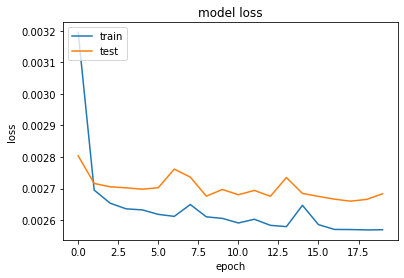

In [ ]:
#학습 진행률
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#예측
predictions = model.predict(x_test)

In [ ]:
#정규화한 것을 실제값으로 변환
val = target_scaler.inverse_transform(y_test)
predic = target_scaler.inverse_transform(predictions)

In [ ]:
#예측값과 실제 값 오차
rmse = np.sqrt(np.mean(predic - y_test)**2)
rmse

2021-12    0.859425
dtype: float64

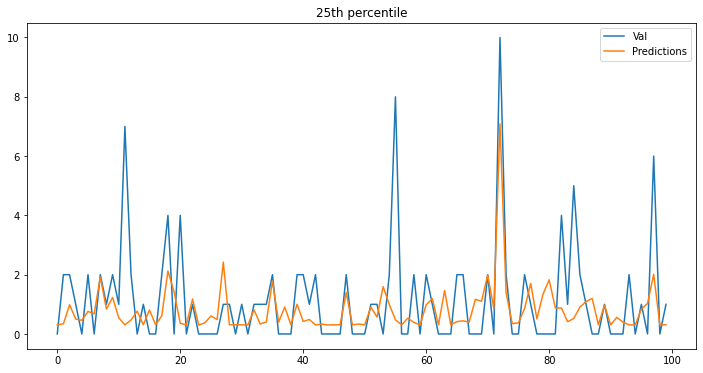

In [ ]:
plt.figure(figsize=(12,6))
plt.title('25th percentile')
plt.plot(val[400:500])
plt.plot(predic[400:500])
plt.legend(['Val', 'Predictions'])

In [ ]:
data = pdf1.loc[:,['202102',
 '202103',
 '202104',
 '202105',
 '202106',
 '202107',
 '202108',
 '202109',
 '202110',
 '202111',
 '202112']]

from sklearn.preprocessing import MinMaxScaler

data_scaler = MinMaxScaler()
data_scaled = data_scaler.fit_transform(data)

In [ ]:
data = pd.DataFrame(data_scaled,columns=['202102',
 '202103',
 '202104',
 '202105',
 '202106',
 '202107',
 '202108',
 '202109',
 '202110',
 '202111',
 '202112'])
data = data.fillna(0)
data

,202102,202103,202104,202105,202106,202107,202108,202109,202110,202111,202112
0,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000
1,0.000000,0.04,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.041667,0.08,0.052632,0.00,0.043478,0.034483,0.100000,0.090909,0.058824,0.038462,0.068966
3,0.000000,0.00,0.000000,0.05,0.000000,0.000000,0.000000,0.136364,0.117647,0.000000,0.103448
4,0.041667,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
21764,0.000000,0.00,0.000000,0.00,0.000000,0.034483,0.000000,0.045455,0.000000,0.000000,0.000000
21765,0.000000,0.04,0.000000,0.00,0.043478,0.068966,0.200000,0.090909,0.000000,0.038462,0.000000
21766,0.000000,0.04,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
21767,0.041667,0.00,0.052632,0.00,0.043478,0.000000,0.033333,0.045455,0.000000,0.000000,0.034483


In [ ]:
predictions = model.predict(data)
predictions

array([[0.01039984],
       [0.01068191],
       [0.04196382],
       ...,
       [0.01068191],
       [0.01933542],
       [0.06933269]], dtype=float32)

In [ ]:
predic = target_scaler.inverse_transform(predictions)
predic = np.round(predic,1)
predic

array([[0.3],
       [0.3],
       [1.2],
       ...,
       [0.3],
       [0.6],
       [2. ]], dtype=float32)

In [ ]:
tmp_pred = pd.DataFrame(predic)
col_name = ['구매건수']
tmp_pred.columns = col_name
tmp_pred

,구매건수
0,0.3
1,0.3
2,1.2
3,1.3
4,0.3
...,...
21764,0.3
21765,0.7
21766,0.3
21767,0.6


In [ ]:
tmp_pred = pd.concat([pdf1["고객번호"],tmp_pred], axis=1)
tmp_pred

,고객번호,구매건수
0,M000034966,0.3
1,M000059535,0.3
2,M000136117,1.2
3,M000225114,1.3
4,M000261625,0.3
...,...,...
21764,M999708287,0.3
21765,M999770689,0.7
21766,M999849895,0.3
21767,M999926092,0.6


#클러스터 추가 1

In [ ]:
cls = pd.read_csv('/content/clustering2.csv')
cls

,고객번호,영수증 번호,제휴사,점포코드,채널 구분,이용일자,방문일자,이용시간,이용금액,연월,mean,median,amax,amin,score,clusters,성별,연령대,거주지대분류코드
0,M839993508,21102612B015763935,B01,B010012,1,2021-10-26,20211026,12,60000,202110,1.571429,1.0,3,1,0,0,남성,70대,Z17
1,M839993508,21110610B014219744,B01,B010012,1,2021-11-06,20211106,10,17100,202111,1.571429,1.0,3,1,0,0,남성,70대,Z17
2,M839993508,21021112B013419710,B01,B010012,1,2021-02-11,20210211,12,136500,202102,1.571429,1.0,3,1,0,0,남성,70대,Z17
3,M839993508,21092010B012637545,B01,B010012,1,2021-09-20,20210920,10,34200,202109,1.571429,1.0,3,1,0,0,남성,70대,Z17
4,M839993508,21101009D015920171,D01,D010614,1,2021-10-10,20211010,9,2500,202110,1.571429,1.0,3,1,0,0,남성,70대,Z17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248299,M321652667,21092413D013710723,D01,D010143,1,2021-09-24,20210924,13,16400,202109,1.666667,2.0,2,1,0,0,여성,20대,Z13
248300,M321652667,21101812D023790496,D02,D020245,1,2021-10-18,20211018,12,9100,202110,1.666667,2.0,2,1,0,0,여성,20대,Z13
248301,M736929241,21091422C014625802,C01,C010011,2,2021-09-14,20210915,22,26000,202109,1.000000,1.0,1,1,0,0,남성,20대,Z17
248302,M040608978,21102916C024520111,C02,C020002,1,2021-10-29,20211029,16,27500,202110,1.000000,1.0,1,1,0,0,남성,20대,Z04


In [ ]:
n_cls = pd.merge(tmp_pred, cls[["고객번호", "score", "clusters"]], on = '고객번호', how = 'inner')
n_cls

,고객번호,구매건수,score,clusters
0,M000034966,0.3,0,0
1,M000059535,0.3,0,0
2,M000136117,1.2,0,0
3,M000136117,1.2,0,0
4,M000136117,1.2,0,0
...,...,...,...,...
248299,M999962961,2.0,0,0
248300,M999962961,2.0,0,0
248301,M999962961,2.0,0,0
248302,M999962961,2.0,0,0


In [ ]:
n_cls = n_cls.drop_duplicates()
n_cls

,고객번호,구매건수,score,clusters
0,M000034966,0.3,0,0
1,M000059535,0.3,0,0
2,M000136117,1.2,0,0
17,M000225114,1.3,0,0
27,M000261625,0.3,0,0
...,...,...,...,...
248256,M999708287,0.3,0,0
248258,M999770689,0.7,0,0
248273,M999849895,0.3,0,0
248274,M999926092,0.6,0,0


In [ ]:
n_cls.groupby(['clusters'], as_index = False)["고객번호"].count()

,clusters,고객번호
0,0,18313
1,1,2902
2,2,48
3,3,506


In [ ]:
n_cls.groupby(['clusters'], as_index = False)["구매건수"].sum()

,clusters,구매건수
0,0,12309.600586
1,1,4867.200195
2,2,82.800003
3,3,1523.300049


In [ ]:
n_cls.groupby(['clusters'], as_index = False)["구매건수"].mean()

,clusters,구매건수
0,0,0.672178
1,1,1.677188
2,2,1.725000
3,3,3.010474


In [ ]:
n_cls.groupby(['score',"clusters"], as_index = False)["고객번호"].count()

,score,clusters,고객번호
0,0,0,18296
1,0,1,603
2,1,0,17
3,1,1,2299
4,1,2,48
5,1,3,506


# 이용금액 예측

In [ ]:
grouped = df3.groupby(['고객번호','연월'], as_index = False)["이용금액"].sum()
grouped

,고객번호,연월,이용금액
0,M000034966,202110,3900
1,M000059535,202103,46000
2,M000136117,202102,13200
3,M000136117,202103,27500
4,M000136117,202104,16100
...,...,...,...
112325,M999962961,202107,49000
112326,M999962961,202108,74000
112327,M999962961,202109,84400
112328,M999962961,202110,39800


In [ ]:
pdf1 = pd.pivot_table(grouped,                # 피벗할 데이터프레임
                     index = '고객번호',    # 행 위치에 들어갈 열
                     columns = '연월',    # 열 위치에 들어갈 열
                     values = '이용금액')
pdf1

연월,202101,202102,202103,202104,202105,202106,202107,202108,202109,202110,202111,202112
고객번호,,,,,,,,,,,,
M000034966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3900.0,NaN,NaN
M000059535,NaN,NaN,46000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M000136117,NaN,13200.0,27500.0,16100.0,NaN,17900.0,18400.0,42300.0,30600.0,19700.0,20500.0,31200.0
M000225114,NaN,NaN,NaN,NaN,117500.0,NaN,NaN,NaN,78500.0,18200.0,NaN,102000.0
M000261625,NaN,23250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
M999708287,NaN,NaN,NaN,NaN,NaN,NaN,34000.0,NaN,26000.0,NaN,NaN,NaN
M999770689,32800.0,NaN,7800.0,NaN,NaN,9100.0,28650.0,120000.0,16400.0,NaN,21000.0,NaN
M999849895,NaN,NaN,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pdf1 = pdf1.fillna(0)
pdf1

연월,202101,202102,202103,202104,202105,202106,202107,202108,202109,202110,202111,202112
고객번호,,,,,,,,,,,,
M000034966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3900.0,0.0,0.0
M000059535,0.0,0.0,46000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M000136117,0.0,13200.0,27500.0,16100.0,0.0,17900.0,18400.0,42300.0,30600.0,19700.0,20500.0,31200.0
M000225114,0.0,0.0,0.0,0.0,117500.0,0.0,0.0,0.0,78500.0,18200.0,0.0,102000.0
M000261625,0.0,23250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
M999708287,0.0,0.0,0.0,0.0,0.0,0.0,34000.0,0.0,26000.0,0.0,0.0,0.0
M999770689,32800.0,0.0,7800.0,0.0,0.0,9100.0,28650.0,120000.0,16400.0,0.0,21000.0,0.0
M999849895,0.0,0.0,15000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pdf1 = pdf1.reset_index()
pdf1

연월,고객번호,202101,202102,202103,202104,202105,202106,202107,202108,202109,202110,202111,202112
0,M000034966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3900.0,0.0,0.0
1,M000059535,0.0,0.0,46000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,M000136117,0.0,13200.0,27500.0,16100.0,0.0,17900.0,18400.0,42300.0,30600.0,19700.0,20500.0,31200.0
3,M000225114,0.0,0.0,0.0,0.0,117500.0,0.0,0.0,0.0,78500.0,18200.0,0.0,102000.0
4,M000261625,0.0,23250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21764,M999708287,0.0,0.0,0.0,0.0,0.0,0.0,34000.0,0.0,26000.0,0.0,0.0,0.0
21765,M999770689,32800.0,0.0,7800.0,0.0,0.0,9100.0,28650.0,120000.0,16400.0,0.0,21000.0,0.0
21766,M999849895,0.0,0.0,15000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21767,M999926092,29100.0,15500.0,0.0,25200.0,0.0,14100.0,0.0,19200.0,16400.0,0.0,0.0,10000.0


In [ ]:
data = pdf1.loc[:,['202101',
 '202102',
 '202103',
 '202104',
 '202105',
 '202106',
 '202107',
 '202108',
 '202109',
 '202110',
 '202111']]
target = pdf1.loc[:,['202112']]

from sklearn.preprocessing import MinMaxScaler

data_scaler = MinMaxScaler()
data_scaled = data_scaler.fit_transform(data)

target_scaler = MinMaxScaler()
target_scaled = target_scaler.fit_transform(target)

In [ ]:
#정규화 결과
data = pd.DataFrame(data_scaled,columns=['202101',
 '202102',
 '202103',
 '202104',
 '202105',
 '202106',
 '202107',
 '202108',
 '202109',
 '202110',
 '202111'])
data = data.fillna(0)
data

,202101,202102,202103,202104,202105,202106,202107,202108,202109,202110,202111
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000053,0.000000
1,0.000000,0.000000,0.009330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000219,0.005578,0.003459,0.000000,0.005178,0.002572,0.008169,0.007798,0.000270,0.000464
3,0.000000,0.000000,0.000000,0.000000,0.016616,0.000000,0.000000,0.000000,0.020004,0.000249,0.000000
4,0.000000,0.000386,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
21764,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004753,0.000000,0.006625,0.000000,0.000000
21765,0.005766,0.000000,0.001582,0.000000,0.000000,0.002632,0.004005,0.023175,0.004179,0.000000,0.000475
21766,0.000000,0.000000,0.003042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
21767,0.005115,0.000257,0.000000,0.005414,0.000000,0.004078,0.000000,0.003708,0.004179,0.000000,0.000000


In [ ]:
#정규화 결과
target = pd.DataFrame(target_scaled,columns=['202112'])
target = target.fillna(0)
target

In [ ]:
np.shape(data)

(21769, 11)

In [ ]:
data = np.array(data)
data = np.reshape(data, (data.shape[0], data.shape[1],1))
np.shape(data)

(21769, 11, 1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle = False)

In [ ]:
x_train_shape = np.shape(x_train)
y_train_shape = np.shape(y_train)
x_test_shape = np.shape(x_test)
y_test_shape = np.shape(y_test)

print('x_train:',x_train_shape, 'y_train:',y_train_shape)
print('x_test:',x_test_shape, 'y_test:',y_test_shape)

x_train: (17415, 11, 1) y_train: (17415, 1)
x_test: (4354, 11, 1) y_test: (4354, 1)


In [ ]:
#모델 생성
model  = Sequential()
model.add(LSTM(48, activation='tanh',input_shape=(11,1)))
model.add(Dense(64,kernel_initializer = 'uniform',activation='relu'))
model.add(Dense(1,kernel_initializer = 'uniform',activation='relu'))
model.compile(loss='mse', optimizer='adam')
model.summary()

history = model.fit(x_train, y_train, batch_size=256, epochs=20, validation_data=(x_test, y_test))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 48)                9600      
                                                                 
 dense_12 (Dense)            (None, 64)                3136      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12,801
Trainable params: 12,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
69/69 [==============================] - 8s 62ms/step - loss: 7.7402e-05 - val_loss: 2.1300e-05
Epoch 2/20
69/69 [==============================] - 1s 18ms/step - loss: 7.8234e-05 - val_loss: 2.1337e-05
Epoch 3/20
69/69 [==============================] - 1s 17ms/step - loss: 7.8230e-05 - val_loss: 2.13

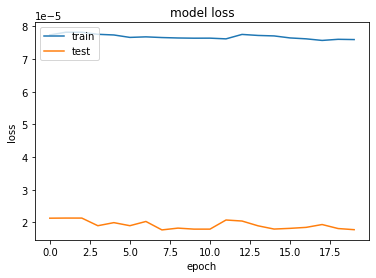

In [ ]:
#학습 진행률
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#예측
predictions = model.predict(x_test)

In [ ]:
#정규화한 것을 실제값으로 변환
val = target_scaler.inverse_transform(y_test)
predic = target_scaler.inverse_transform(predictions)

In [ ]:
#예측값과 실제 값 오차
rmse = np.sqrt(np.mean(predic - y_test)**2)
rmse

202112    20863.525257
dtype: float64

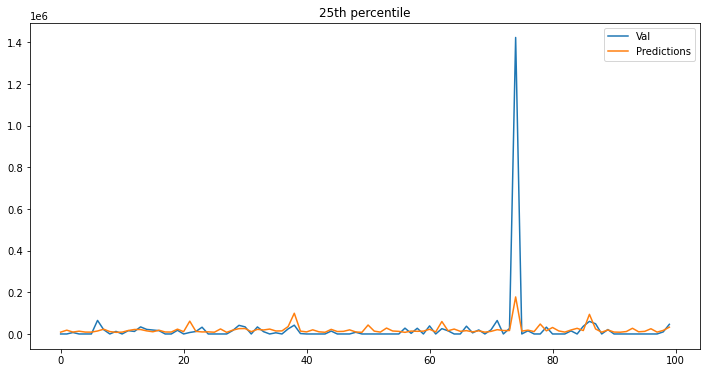

In [ ]:
plt.figure(figsize=(12,6))
plt.title('25th percentile')
plt.plot(val[-100:])
plt.plot(predic[-100:])
plt.legend(['Val', 'Predictions'])

In [ ]:
data = pdf1.loc[:,['202102',
 '202103',
 '202104',
 '202105',
 '202106',
 '202107',
 '202108',
 '202109',
 '202110',
 '202111',
 '202112']]

from sklearn.preprocessing import MinMaxScaler

data_scaler = MinMaxScaler()
data_scaled = data_scaler.fit_transform(data)

In [ ]:
data = pd.DataFrame(data_scaled,columns=['202102',
 '202103',
 '202104',
 '202105',
 '202106',
 '202107',
 '202108',
 '202109',
 '202110',
 '202111',
 '202112'])
data = data.fillna(0)
data

,202102,202103,202104,202105,202106,202107,202108,202109,202110,202111,202112
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000053,0.000000,0.000000
1,0.000000,0.009330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000219,0.005578,0.003459,0.000000,0.005178,0.002572,0.008169,0.007798,0.000270,0.000464,0.001313
3,0.000000,0.000000,0.000000,0.016616,0.000000,0.000000,0.000000,0.020004,0.000249,0.000000,0.004292
4,0.000386,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
21764,0.000000,0.000000,0.000000,0.000000,0.000000,0.004753,0.000000,0.006625,0.000000,0.000000,0.000000
21765,0.000000,0.001582,0.000000,0.000000,0.002632,0.004005,0.023175,0.004179,0.000000,0.000475,0.000000
21766,0.000000,0.003042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
21767,0.000257,0.000000,0.005414,0.000000,0.004078,0.000000,0.003708,0.004179,0.000000,0.000000,0.000421


In [ ]:
predictions = model.predict(data)
predictions

array([[0.00032856],
       [0.00047815],
       [0.00093437],
       ...,
       [0.0003767 ],
       [0.00064114],
       [0.00141293]], dtype=float32)

In [ ]:
predic = target_scaler.inverse_transform(predictions)
predic = np.round(predic)
predic

array([[ 7808.],
       [11363.],
       [22206.],
       ...,
       [ 8952.],
       [15237.],
       [33579.]], dtype=float32)

In [ ]:
tmp_pred = pd.DataFrame(predic)
col_name = ['구매금액']
tmp_pred.columns = col_name
tmp_pred

,구매금액
0,7808.0
1,11363.0
2,22206.0
3,24767.0
4,7929.0
...,...
21764,12607.0
21765,23026.0
21766,8952.0
21767,15237.0


In [ ]:
tmp_pred = pd.concat([pdf1["고객번호"],tmp_pred], axis=1)
tmp_pred

,고객번호,구매금액
0,M000034966,7808.0
1,M000059535,11363.0
2,M000136117,22206.0
3,M000225114,24767.0
4,M000261625,7929.0
...,...,...
21764,M999708287,12607.0
21765,M999770689,23026.0
21766,M999849895,8952.0
21767,M999926092,15237.0


#클러스터 추가 2

In [ ]:
n_cls = pd.merge(tmp_pred, cls[["고객번호", "score", "clusters"]], on = '고객번호', how = 'inner')
n_cls

,고객번호,구매금액,score,clusters
0,M000034966,7808.0,0,0
1,M000059535,11363.0,0,0
2,M000136117,22206.0,0,0
3,M000136117,22206.0,0,0
4,M000136117,22206.0,0,0
...,...,...,...,...
248299,M999962961,33579.0,0,0
248300,M999962961,33579.0,0,0
248301,M999962961,33579.0,0,0
248302,M999962961,33579.0,0,0


In [ ]:
n_cls = n_cls.drop_duplicates()
n_cls

,고객번호,구매금액,score,clusters
0,M000034966,7808.0,0,0
1,M000059535,11363.0,0,0
2,M000136117,22206.0,0,0
17,M000225114,24767.0,0,0
27,M000261625,7929.0,0,0
...,...,...,...,...
248256,M999708287,12607.0,0,0
248258,M999770689,23026.0,0,0
248273,M999849895,8952.0,0,0
248274,M999926092,15237.0,0,0


In [ ]:
# 클러스터 별 고객 비율
n_cls.groupby(['clusters'], as_index = False)["고객번호"].count()

,clusters,고객번호
0,0,18313
1,1,2902
2,2,48
3,3,506


In [ ]:
n_cls.groupby(['clusters'], as_index = False)["구매금액"].sum()

,clusters,구매금액
0,0,310822016.0
1,1,100751352.0
2,2,1000877.0
3,3,24712102.0


In [ ]:
n_cls.groupby(['clusters'], as_index = False)["구매금액"].mean()

,clusters,구매금액
0,0,16972.751953
1,1,34717.902344
2,2,20851.603516
3,3,48838.144531


In [ ]:
n_cls.groupby(['score',"clusters"], as_index = False)["고객번호"].count()

,score,clusters,고객번호
0,0,0,18296
1,0,1,603
2,1,0,17
3,1,1,2299
4,1,2,48
5,1,3,506
